In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

import numpy as np

In [2]:
def display_image (path:str):
    img = Image.open(path)  
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

### Handwritten Dataset Split

In [3]:
typed_df = pd.read_csv("../raw_data/cleaned_typed_folder_match.csv")

In [4]:
typed_df.head(5)

,image_filename,line_text
0,3642_line_1.png,ዜናው እ አ አቆጣጠር ሰኔ 26 2013 በኢትዮጵያ ሳተላይት ቴሌቪዠ...
1,3642_line_2.png,ባስተላለፈው ዜና ፡ የወያኔው የደህንነት አባላት ለሚፈጽሙት ማንኛ...
2,3642_line_3.png,ለምክር ቤት መቅረቡን አርድቶን ነበር። ኢየሱስን አሁንም ስለማግ...
3,3642_line_4.png,በአዲስ አበባ ስቴዲዮም በመገኘት የ 1 ኛ ተከሳሽን የኢ .። በካ...
4,3642_line_5.png,ሆስፒታሎችና ትምህርት ቤቶች ሲጋራ እንዳይ ጬስ በማድረግ ቅድሚ...


In [5]:
test_typed = pd.read_csv("../raw_data/Amharic_Data/test/typed_test.csv")

In [6]:
test_typed.head(5)

,image_filename,line_text,type
0,typed_3642_line_6.png,የመቀሌ ከተማ መሆኑን ዘገባው አስነብቧል። ምንጮቹ በአከባቢያቸው...,typed
1,typed_283_line_2.png,ነበር። ፈገግታ ከፊቷ የማይለያት ነጺ ፣ አባ ለማን እንዳሰቡሽ ...,typed
2,typed_283_line_3.png,ተመሳሳይ ዓላማና ግብ ይዣለሁ ብሎ የተበታተነ ድርጅት የሚገነባው...,typed
3,typed_283_line_5.png,የሚያሰማውን ጩኸት ላለመስማት ጆሮውን የሚደፍን ሁሉ ፣ እሱ ራሱ ...,typed
4,typed_3777_line_1.png,ዦክሃር ሳርናየቭ የተባለው የ 21 ዓመት ወጣት አሸባሪ ይህን ...,typed


In [7]:
skip_files = []

for row in test_typed.iterrows():
    file_name = "_".join(row[1]['image_filename'].split("_")[1:])
    print(file_name)
    if file_name in typed_df['image_filename'].values:
        skip_files.append(file_name)

    
  

3642_line_6.png
283_line_2.png
283_line_3.png
283_line_5.png
3777_line_1.png
3777_line_2.png
3777_line_3.png
3777_line_8.png
1498_line_6.png
1498_line_7.png
374_line_6.png
426_line_4.png
3306_line_2.png
3306_line_5.png
1946_line_3.png
930_line_3.png
4199_line_1.png
4199_line_3.png
3066_line_6.png
3674_line_1.png
3674_line_2.png
3674_line_3.png
3674_line_4.png
644_line_7.png
3764_line_1.png
3325_line_1.png
3325_line_6.png
3537_line_1.png
3537_line_6.png
1714_line_1.png
1714_line_3.png
2209_line_1.png
2209_line_2.png
2209_line_5.png
2209_line_6.png
2240_line_4.png
2240_line_5.png
2240_line_6.png
2948_line_7.png
690_line_2.png
690_line_5.png
690_line_6.png
3918_line_5.png
3918_line_6.png
3951_line_2.png
643_line_1.png
513_line_2.png
513_line_5.png
513_line_6.png
513_line_7.png
4221_line_5.png
4221_line_7.png
3700_line_7.png
3673_line_1.png
3673_line_2.png
3673_line_7.png
645_line_2.png
645_line_4.png
645_line_5.png
645_line_6.png
572_line_4.png
572_line_7.png
94_line_1.png
3538_line_1.png

In [8]:
len(skip_files)

5885

In [9]:
len(test_typed)

5924

In [10]:
typed_df = typed_df[~typed_df['image_filename'].isin(skip_files)]

In [ ]:
# typed_df = typed_df[~typed_df['line_code'].isin(line_codes)]

In [11]:
typed_root = "../raw_data/extracted_lines/"

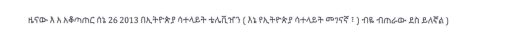

ዜናው  እ አ አቆጣጠር  ሰኔ 26 2013 በኢትዮጵያ  ሳተላይት  ቴሌቪዠን  ( እኔ የኢትዮጵያ  ሳተላይት  መገናኛ  ፣ ) ብዬ ብጠራው  ደስ ይለኛል  ) 



In [12]:
display_image(os.path.join(typed_root , typed_df.iloc[0]['image_filename']))  
print(typed_df.iloc[0]['line_text'])

In [13]:
texts = typed_df['line_text'].tolist()

In [14]:
from collections import Counter
all_text = ''.join(texts)
char_counts = Counter(all_text)



In [15]:
sorted_counts = dict(sorted(char_counts.items(), key=lambda item: item[1], reverse=True))



In [16]:

texts = typed_df['line_text'].dropna().astype(str)
char_df = pd.DataFrame(char_counts.items(), columns=["char", "count"])

# Compute 95th percentile threshold
threshold = np.percentile(char_df['count'], 26)

# Define rare characters: strictly below 95th percentile
rare_chars = set(char_df[char_df['count'] < threshold]['char'])

# Tag rows that contain rare characters
def contains_rare_char(text):
    return any(char in rare_chars for char in text)

typed_df['has_rare'] = texts.apply(contains_rare_char)

# Calculate percentage
percentage = (typed_df['has_rare'].sum() / len(typed_df)) * 100
print(f"Percentage of entries with rare characters: {percentage:.2f}%")


Percentage of entries with rare characters: 10.96%


In [17]:

#seperate df with rare and non rare characters
typed_df_rare = typed_df[typed_df['has_rare'] == True]
typed_df_non_rare = typed_df[typed_df['has_rare'] == False]

In [18]:
len(typed_df_rare), len(typed_df_non_rare)

(2456, 19962)

In [19]:
typed_df_non_rare['type'] = 'typed'

/tmp/ipykernel_81541/267300562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typed_df_non_rare['type'] = 'typed'


In [20]:
typed_df_non_rare.head(5)

,image_filename,line_text,has_rare,type
0,3642_line_1.png,ዜናው እ አ አቆጣጠር ሰኔ 26 2013 በኢትዮጵያ ሳተላይት ቴሌቪዠ...,False,typed
1,3642_line_2.png,ባስተላለፈው ዜና ፡ የወያኔው የደህንነት አባላት ለሚፈጽሙት ማንኛ...,False,typed
2,3642_line_3.png,ለምክር ቤት መቅረቡን አርድቶን ነበር። ኢየሱስን አሁንም ስለማግ...,False,typed
3,3642_line_4.png,በአዲስ አበባ ስቴዲዮም በመገኘት የ 1 ኛ ተከሳሽን የኢ .። በካ...,False,typed
4,3642_line_5.png,ሆስፒታሎችና ትምህርት ቤቶች ሲጋራ እንዳይ ጬስ በማድረግ ቅድሚ...,False,typed


In [21]:
train_df = pd.DataFrame(columns=['image_filename', 'line_text', 'type'])

In [22]:
len(typed_df)

22418

In [23]:
import os
import shutil
from PIL import Image
count = 0
possible_duplicates = []
for i in range(len(typed_df)):
    source_file = (os.path.join(typed_root , typed_df.iloc[i]['image_filename']))  
    destination_file = os.path.join("../raw_data/Amharic_Data/train", ("typed_" + typed_df.iloc[i]['image_filename']))

    if os.path.isfile(source_file):
        shutil.copy2(source_file, destination_file)
   
    new_row = pd.DataFrame({'image_filename': ["typed_" + typed_df.iloc[i]['image_filename']], 
                        'line_text': [typed_df.iloc[i]['line_text']], 
                        'type': ['typed']})

    # Use pd.concat to append the new row to the DataFrame
    train_df = pd.concat([train_df, new_row], ignore_index=True)

In [24]:
len(train_df)

22418

In [72]:
#check rows that have the string 4084
sub_sample = typed_df[typed_df['image_filename'].str.contains("4084")]

In [73]:
len(sub_sample)

0

4084_line_1.png


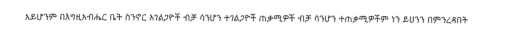

አይሆንም በእግዚአብሔር ቤት ስንኖር አገልጋዮች ብቻ ሳንሆን ተገልጋዮች ጠቃሚዎች ብቻ ሳንሆን ተጠቃሚዎችም ነን ይህንን በምንረዳበት

4084_line_2.png


ጊዜ የእግዚአብሔር ባሕርያት በውስጣችን እያደጉ ይመጣሉ እኔ ብቻ ከሚል ነገር እንወጣለን ግለኝነትን እናስወግዳለን ብዙ ሰዎች ግን እንደዚህ

4084_line_4.png


፯ መጽሐፍ ሲናገር ወለኩሉ ዘብዙኀ ወሀብዎ ብዙኀ ይትኀሠሥዎ ወለዘኒ ውኁደ አማኅፀንዎ ውኁደ ይትኀሠሥዎ ትርጉም ብዙም ከተሰጠው

4084_line_5.png


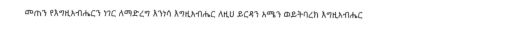

ሰው ሁሉ ከእርሱ ብዙ ይፈለግበታል ብዙ አደራም ከተሰጠው ከእርሱ አብዝተው ይሹበታል የሉቃስ ወንጌል  ፲፪ ፥ ፵፰ ይለናልና ቃሉ በተሰጠን



In [52]:
for i in range(len(sub_sample)):
    source_file = (os.path.join(typed_root , sub_sample.iloc[i]['image_filename'])) 
    print(sub_sample.iloc[i]['image_filename']) 
    display_image(source_file)
    print(sub_sample.iloc[i]['line_text'])

In [55]:
22418 - 20658

1760

In [25]:
train_df.to_csv("../raw_data/Amharic_Data/train/typed_train.csv", index=False)

In [75]:
test_df.head()

,image_filename,line_text,type
0,typed_3642_line_6.png,የመቀሌ ከተማ መሆኑን ዘገባው አስነብቧል። ምንጮቹ በአከባቢያቸው...,typed
1,typed_283_line_2.png,ነበር። ፈገግታ ከፊቷ የማይለያት ነጺ ፣ አባ ለማን እንዳሰቡሽ ...,typed
2,typed_283_line_3.png,ተመሳሳይ ዓላማና ግብ ይዣለሁ ብሎ የተበታተነ ድርጅት የሚገነባው...,typed
3,typed_283_line_5.png,የሚያሰማውን ጩኸት ላለመስማት ጆሮውን የሚደፍን ሁሉ ፣ እሱ ራሱ ...,typed
4,typed_3777_line_1.png,ዦክሃር ሳርናየቭ የተባለው የ 21 ዓመት ወጣት አሸባሪ ይህን ...,typed
